<a href="https://colab.research.google.com/github/maggiecrowner/DS4002-projects/blob/main/DSProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning **

In [2]:
! git clone https://github.com/maggiecrowner/DS4002-projects

Cloning into 'DS4002-projects'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 204.46 KiB | 2.69 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
import pandas as pd

In [10]:
# formatting the text data and getting sentence and word count variables
df = pd.read_csv("/content/DS4002-projects/email_spam.csv")
df['text'] = df['text'].apply(lambda x: x.replace('\n', ' '))
df['text_sentences'] = df['text'].str.count(r'[.!?]')
df['text'] = df['text'].replace(r'[^\w\s]', '', regex=True)
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.split()
df['text_words'] = df['text'].str.len()

# formatting the title data and getting word count variable
df['title'] = df['title'].replace(r'[^\w\s]', '', regex=True)
df['title'] = df['title'].apply(lambda x: x.lower())
df['title'] = df['title'].str.split()
df['title_words'] = df['title'].str.len()

# subsetting to take out most frequent words (text)
text_words = df['text'].explode()
twc = text_words.value_counts()
twc = twc.reset_index()
twc.columns = ['word', 'count']
filtered_words = set(twc[twc['count'] < 50]['word'])

# finding the most common words in spam emails (text)
spam_words = df[df['type'] == 'spam']['text'].explode()
spam_words = spam_words[spam_words.isin(filtered_words)]
spam_word_counts = spam_words.value_counts().reset_index()
spam_word_counts.columns = ['word', 'count']
spam_word_counts = spam_word_counts[spam_word_counts['count']>10]

# finding the most common words in non-spam emails (text)
not_words = df[df['type'] == 'not spam']['text'].explode()
not_words = not_words[not_words.isin(filtered_words)]
not_word_counts = not_words.value_counts().reset_index()
not_word_counts.columns = ['word', 'count']
not_word_counts = not_word_counts[not_word_counts['count']>10]

# creating the dummy variables (text)
dummy_text = {word: df['text'].apply(lambda x: 1 if word in x else 0) for word in spam_word_counts['word']}
dummy_text = pd.DataFrame(dummy_text)
df = pd.concat([df, dummy_text], axis=1)
dummy_text_n = {word: df['text'].apply(lambda x: 1 if word in x else 0) for word in not_word_counts['word']}
dummy_text_n = pd.DataFrame(dummy_text_n)
df = pd.concat([df, dummy_text_n], axis=1)

# subsetting to take out most frequent words (title)
title_words = df['title'].explode()
swc = title_words.value_counts()
swc = swc.reset_index()
swc.columns = ['word', 'count']
filtered_words_s = set(swc[swc['count'] < 10]['word'])

# finding the most common words in spam emails (title)
spam_words_s = df[df['type'] == 'spam']['title'].explode()
spam_words_s = spam_words_s[spam_words_s.isin(filtered_words_s)]
spam_title_counts = spam_words_s.value_counts().reset_index()
spam_title_counts.columns = ['word', 'count']
spam_title_counts = spam_title_counts[spam_title_counts['count']>2]

# finding the most common words in non-spam emails (title)
not_words_s = df[df['type'] == 'not spam']['title'].explode()
not_words_s = not_words_s[not_words_s.isin(filtered_words_s)]
not_title_counts = not_words_s.value_counts().reset_index()
not_title_counts.columns = ['word', 'count']
not_title_counts = not_title_counts[not_title_counts['count']>2]

# creating the dummy variables (title)
dummy_title = {word: df['title'].apply(lambda x: 1 if word in x else 0) for word in spam_title_counts['word']}
dummy_title = pd.DataFrame(dummy_title)
df = pd.concat([df, dummy_title], axis=1)
dummy_title_n = {word: df['title'].apply(lambda x: 1 if word in x else 0) for word in not_title_counts['word']}
dummy_title_n = pd.DataFrame(dummy_title_n)
df = pd.concat([df, dummy_title_n], axis=1)

# dropping extraneous variables
df = df.drop(columns=['text', 'title'])
display(df)

,type,text_sentences,text_words,title_words,here,click,just,now,their,from,...,test,updates,have,update,application,in,device,jobs,re,reward
0,spam,4,51,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,not spam,1,53,5,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,not spam,1,26,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,not spam,5,60,6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,spam,86,1086,13,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,not spam,3,72,13,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
80,not spam,4,70,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
81,not spam,16,168,10,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
82,not spam,47,481,5,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most Common Words for Spam Emails')

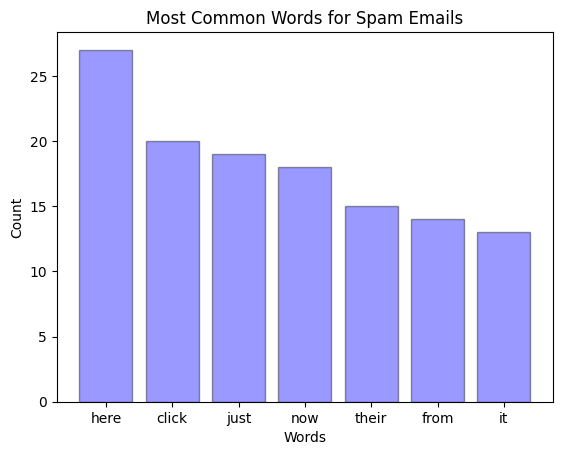

In [17]:
plt.bar(x=spam_word_counts["word"], height=spam_word_counts["count"], edgecolor='black', color='blue', alpha=0.4)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words for Spam Emails')

Text(0.5, 1.0, 'Most Common Words for Non-Spam Emails')

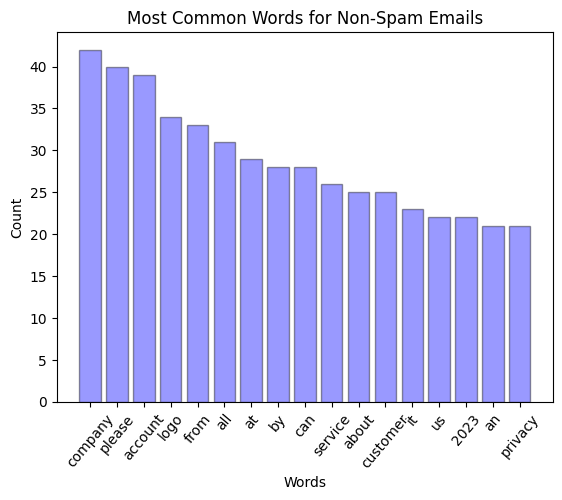

In [21]:
not_word_counts2 = not_word_counts[not_word_counts['count']>20]

plt.bar(x=not_word_counts2["word"], height=not_word_counts2["count"], edgecolor='black', color='blue', alpha=0.4)
plt.xticks(rotation=50)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words for Non-Spam Emails')

**EDA**

In [5]:
df["type"].value_counts()

,count
type,
not spam,58
spam,26


Text(0.5, 1.0, 'Histogram of Sentences in the Body of the Email')

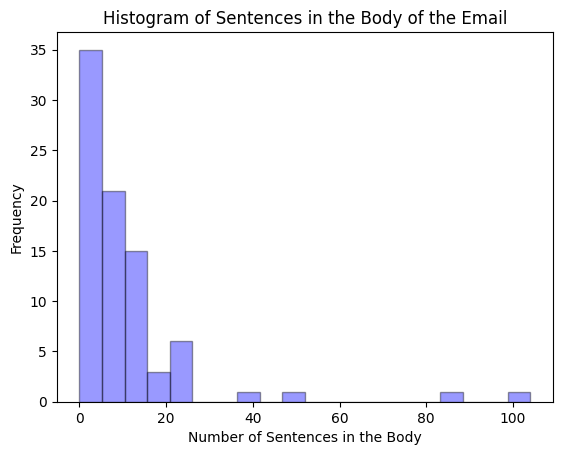

In [6]:
import matplotlib.pyplot as plt
plt.hist(df["text_sentences"], bins=20, edgecolor='black', color='blue', alpha=0.4)
plt.xlabel('Number of Sentences in the Body')
plt.ylabel('Frequency')
plt.title('Histogram of Sentences in the Body of the Email')

Text(0.5, 1.0, 'Histogram of Words in the Body of the Email')

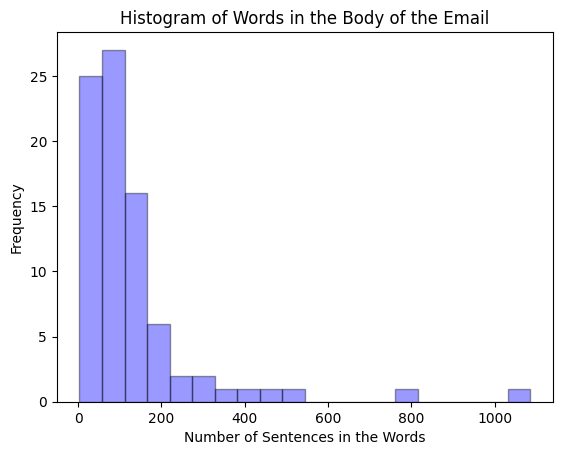

In [7]:
plt.hist(df["text_words"], bins=20, edgecolor='black', color='blue', alpha=0.4)
plt.xlabel('Number of Sentences in the Words')
plt.ylabel('Frequency')
plt.title('Histogram of Words in the Body of the Email')

Text(0.5, 1.0, 'Histogram of Words in the Title of the Email')

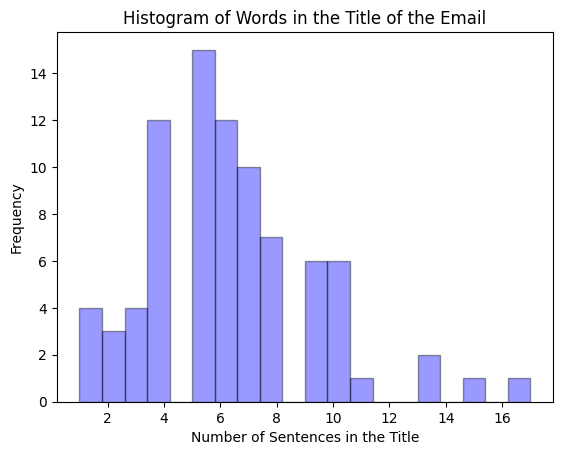

In [8]:
plt.hist(df["title_words"], bins=20, edgecolor='black', color='blue', alpha=0.4)
plt.xlabel('Number of Sentences in the Title')
plt.ylabel('Frequency')
plt.title('Histogram of Words in the Title of the Email')

In [ ]:
df.head()

,type,text_sentences,text_words,title_words,here,click,just,now,their,from,...,test,updates,have,update,application,in,device,jobs,re,reward
0,spam,4,51,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,not spam,1,53,5,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,not spam,1,26,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,not spam,5,60,6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,spam,86,1086,13,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df2 = df.drop(columns = ["type","text_sentences","text_words","title_words"])

In [ ]:
new_df = pd.DataFrame({'Column': df2.columns, 'Sum': df2.sum()})

In [ ]:
new_df.sort_values(by="Sum",ascending=False).head(20)

,Column,Sum
please,please,32
from,from,30
from,from,30
at,at,27
all,all,26
us,us,24
can,can,24
an,an,23
by,by,22
here,here,21
